In [1]:
from Data_in import Dataset1,Dataset2,Dataset3
import torch 

from torch import nn

d:\new_1\envs\new_conda1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['benign_1', 'benign_2', 'benign_3', 'benign_4', 'malignant_1', 'malignant_2', 'malignant_3', 'malignant_4']
['benign_1', 'benign_2', 'benign_3', 'benign_4', 'malignant_1', 'malignant_2', 'malignant_3', 'malignant_4']
['benign_1', 'benign_2', 'benign_3', 'benign_4', 'malignant_1', 'malignant_2', 'malignant_3', 'malignant_4']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195

KeyboardInterrupt: 

In [1]:
import cv2
import torch
from torch.utils.data import DataLoader,RandomSampler
from torchvision.transforms import transforms
from PIL import Image
from torch import Tensor as Ten
import numpy as np
import os
from torch import nn
import math
device='cuda'
Trans1=transforms.Compose(
            [
                # transforms.ColorJitter(brightness=.5,hue=.5),
                # transforms.RandomPerspective(p=0.5,distortion_scale=0.8),
                transforms.ToTensor(),
                transforms.Resize((224,224)),
                transforms.RandomVerticalFlip(p=0.5),
                transforms.RandomHorizontalFlip(p=0.5)
                # transforms.RandomApply(transforms)
                ]
        )
# Trans2=transforms.Compose(
#     [
#         # transforms.ToTensor(),
#         transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5),inplace=True)
#     ]
# )
class Dataset():
    def __init__(self,path_dir,Model):
        self.Blur1=transforms.GaussianBlur(kernel_size=7,sigma=(10,15))
        self.Blur2=transforms.GaussianBlur(kernel_size=7,sigma=(20,25))
        self.path_dir=path_dir
        self.list_class=os.listdir(path_dir)
        print(self.list_class)
        self.list_dir=[]
        self.target=[]
        Class=0
        if Model=="Train":
            for i in self.list_class:
                path_temp = os.listdir(path_dir + "/" + i)
                for x in path_temp[:int(len(path_temp)*0.9)]:
                    self.list_dir.append(path_dir + "/" + i+"/"+x)
                    self.target.append(Class)
                Class+=1
        if Model=="Val":
            for i in self.list_class:
                path_temp=os.listdir(path_dir + "/" + i)
                for x in path_temp[int(len(path_temp)*0.8):]:
                    self.list_dir.append(path_dir + "/" + i+"/"+x)
                    self.target.append(Class)
                Class+=1
        if Model=="T_Val":
            for i in self.list_class:
                path_temp=os.listdir(path_dir + "/" + i)[:]
                for x in path_temp:
                    self.list_dir.append(path_dir + "/" + i+"/"+x)
                    self.target.append(Class)
                Class+=1
        pass
    def __len__(self):
        # print("Data_Len",len(self.target))
        return len(self.target)
        pass
    def __getitem__(self, item):
        img=Image.open(self.list_dir[item])
        img=img.convert('RGB')
        img=(Trans1(img))
        target=self.target[item]
        return img,target
        pass
# batch_size = 1
# class_sample_count = [444, 1014, 453, 569, 3451,626,792,560] # dataset has 10 class-1 samples, 1 class-2 samples, etc.
# weights = 2 / torch.Tensor(class_sample_count)
# sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, batch_size) # 注意这里的weights应为所有样本的权重序列，其长度为所有样本长度。

Dataset1=DataLoader(Dataset("G:/DATAS/breast_2/breast_2/train","Train"),batch_size=10,shuffle=True)
Dataset2=DataLoader(Dataset("G:/DATAS/breast_2/breast_2/val","Val"),shuffle=True,batch_size=4)
Dataset3=DataLoader(Dataset("G:/DATAS/breast_2/breast_2/test","T_Val"),shuffle=True,batch_size=4)

d:\new_1\envs\new_conda1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['benign_1', 'benign_2', 'benign_3', 'benign_4', 'malignant_1', 'malignant_2', 'malignant_3', 'malignant_4']
['benign_1', 'benign_2', 'benign_3', 'benign_4', 'malignant_1', 'malignant_2', 'malignant_3', 'malignant_4']
['benign_1', 'benign_2', 'benign_3', 'benign_4', 'malignant_1', 'malignant_2', 'malignant_3', 'malignant_4']


In [12]:
Model1=torch.load('./weights/Model1_1.pt').cuda()
print(Model1)
Features=[]
Targets=[]
for i, (img,target)  in enumerate(Dataset1):
    print(i)
    img=img.cuda()
    feature=Model1.forward(img)
    print(feature.shape)
    Features.append(feature.cpu().detach().numpy())
    Targets.append(target.detach().numpy())

EffNetV2(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU()
    )
    (1): MBConv(
      (conv): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
        (3): Conv2d(24, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (4): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): MBConv(
      (conv): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
        (3): Conv2d(24, 24, kernel_size=(1, 1), stride=(1, 1), b

In [17]:
# Features=np.array(Features)
# Features=Features.reshape(Features.shape[0]*Features.shape[1],Features.shape[2])
# Targets=np.array(Targets)
# Targets=Targets.reshape(Targets.shape[0]*Targets.shape[1])
Targets=Targets.reshape(-1,1)


In [18]:
print(Features.shape)
print(Targets.shape)

(12960, 8)
(12960, 1)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Targets, test_size=0.01, random_state=124)


In [20]:
print(Features.shape)

(12960, 8)


In [34]:
Modelx1=RandomForestClassifier(n_estimators=100)
Modelx1.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Modelx1.predict(X_test)))
Modelx2=KNeighborsClassifier(n_neighbors=16)
Modelx2.fit(X_train,y_train)
print(accuracy_score(y_test,Modelx2.predict(X_test)))
Modelx3=SVC()
Modelx3.fit(X_train,y_train)
print(accuracy_score(y_test,Modelx3.predict(X_test)))

C:\Users\admin\AppData\Local\Temp\ipykernel_2188\3077970273.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Modelx1.fit(X_train,y_train)


1.0
1.0


d:\new_1\envs\new_conda1\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\new_1\envs\new_conda1\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


In [28]:
Features1=[]
Targets1=[]
for i, (img,target)  in enumerate(Dataset3):
    print(i)
    img=img.cuda()
    feature=Model1.forward(img)
    print(feature.shape)
    Features1.append(feature.cpu().detach().numpy())
    Targets1.append(target.detach().numpy())

0
torch.Size([4, 8])
1
torch.Size([4, 8])
2
torch.Size([4, 8])
3
torch.Size([4, 8])
4
torch.Size([4, 8])
5
torch.Size([4, 8])
6
torch.Size([4, 8])
7
torch.Size([4, 8])
8
torch.Size([4, 8])
9
torch.Size([4, 8])
10
torch.Size([4, 8])
11
torch.Size([4, 8])
12
torch.Size([4, 8])
13
torch.Size([4, 8])
14
torch.Size([4, 8])
15
torch.Size([4, 8])
16
torch.Size([4, 8])
17
torch.Size([4, 8])
18
torch.Size([4, 8])
19
torch.Size([4, 8])
20
torch.Size([4, 8])
21
torch.Size([4, 8])
22
torch.Size([4, 8])
23
torch.Size([4, 8])
24
torch.Size([4, 8])
25
torch.Size([4, 8])
26
torch.Size([4, 8])
27
torch.Size([4, 8])
28
torch.Size([4, 8])
29
torch.Size([4, 8])
30
torch.Size([4, 8])
31
torch.Size([4, 8])
32
torch.Size([4, 8])
33
torch.Size([4, 8])
34
torch.Size([4, 8])
35
torch.Size([4, 8])
36
torch.Size([4, 8])
37
torch.Size([4, 8])
38
torch.Size([4, 8])
39
torch.Size([4, 8])
40
torch.Size([4, 8])
41
torch.Size([4, 8])
42
torch.Size([4, 8])
43
torch.Size([4, 8])
44
torch.Size([4, 8])
45
torch.Size([4, 8]

In [29]:
Features1=np.array(Features1)
Features1=Features1.reshape(Features1.shape[0]*Features1.shape[1],Features1.shape[2])
Targets1=np.array(Targets1)
Targets1=Targets1.reshape(Targets1.shape[0]*Targets1.shape[1],1)
print(Features1.shape)
print(Targets1.shape)

(7200, 8)
(7200, 1)


In [35]:
print(accuracy_score(Targets1,Modelx1.predict(Features1)))
print(accuracy_score(Targets1,Modelx2.predict(Features1)))
print(accuracy_score(Targets1,Modelx3.predict(Features1)))

0.8675
0.8648611111111111
0.8663888888888889


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       900
           1       0.81      0.78      0.79       900
           2       0.86      0.87      0.86       900
           3       0.88      0.92      0.90       900
           4       0.88      0.85      0.86       900
           5       0.83      0.86      0.84       900
           6       0.88      0.82      0.85       900
           7       0.88      0.93      0.91       900

    accuracy                           0.87      7200
   macro avg       0.87      0.87      0.87      7200
weighted avg       0.87      0.87      0.87      7200

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       900
           1       0.81      0.79      0.80       900
           2       0.87      0.86      0.86       900
           3       0.88      0.92      0.90       900
           4       0.86      0.87      0.87       900
           5       0.83 

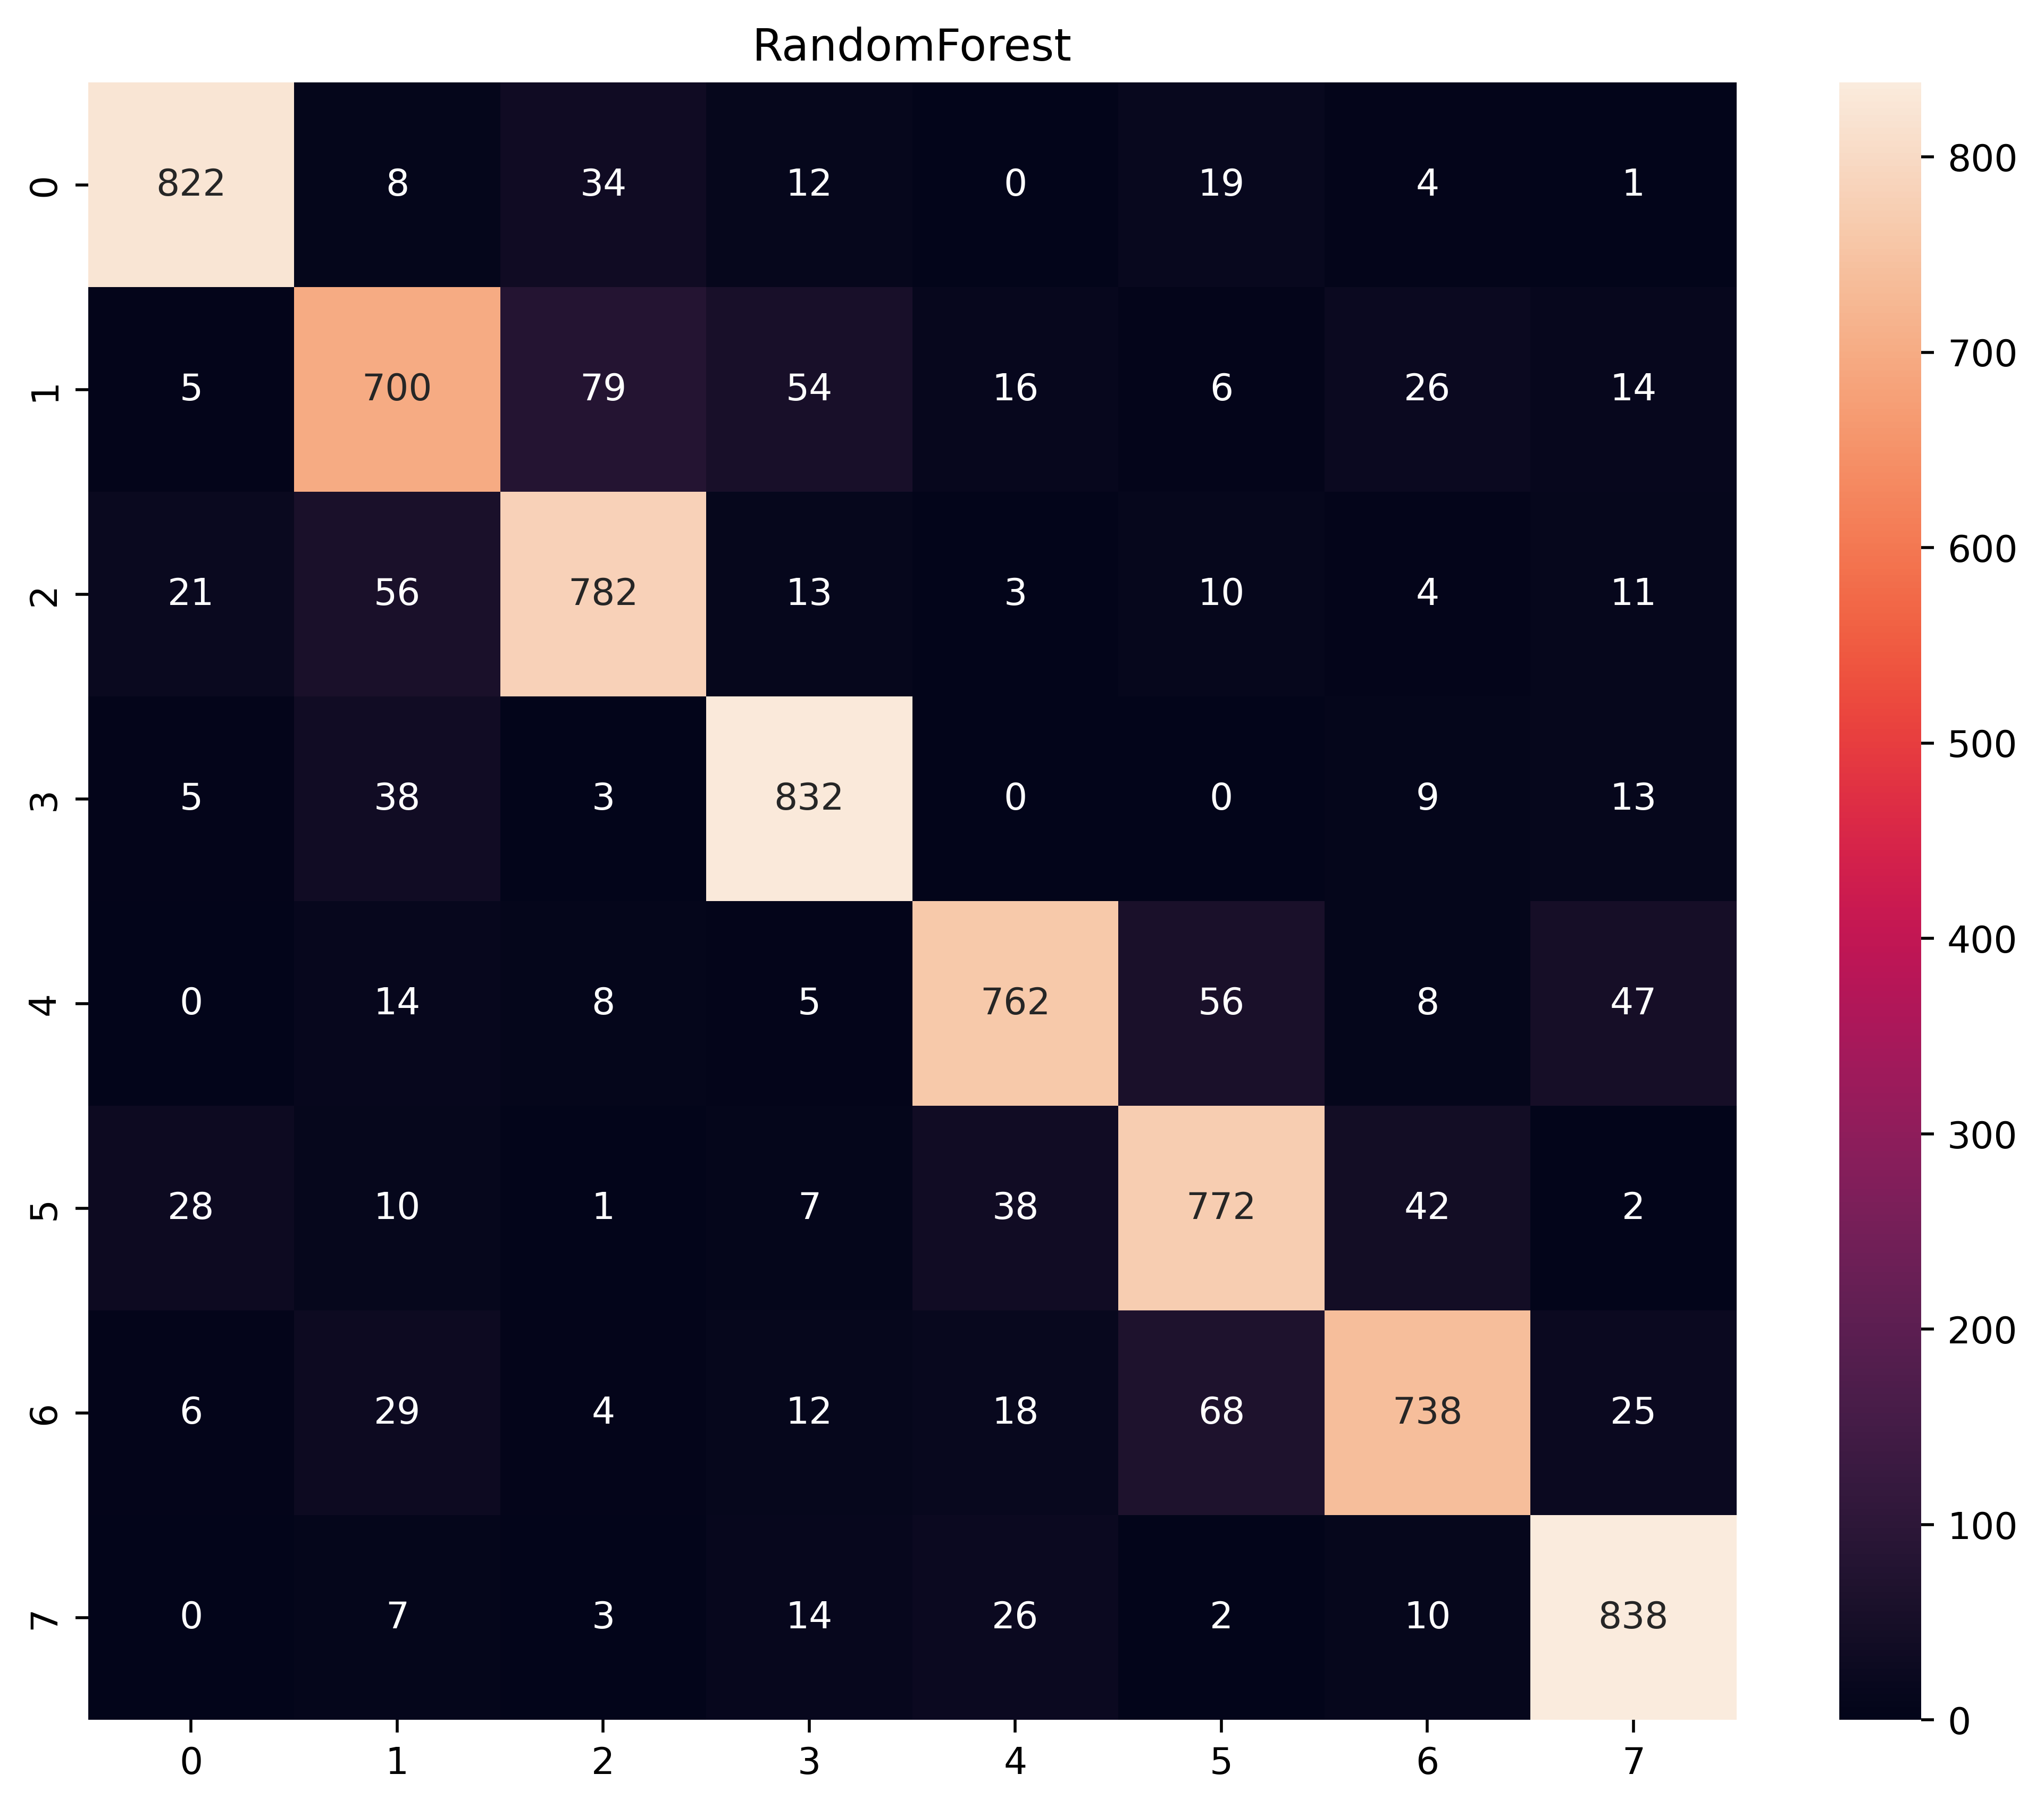

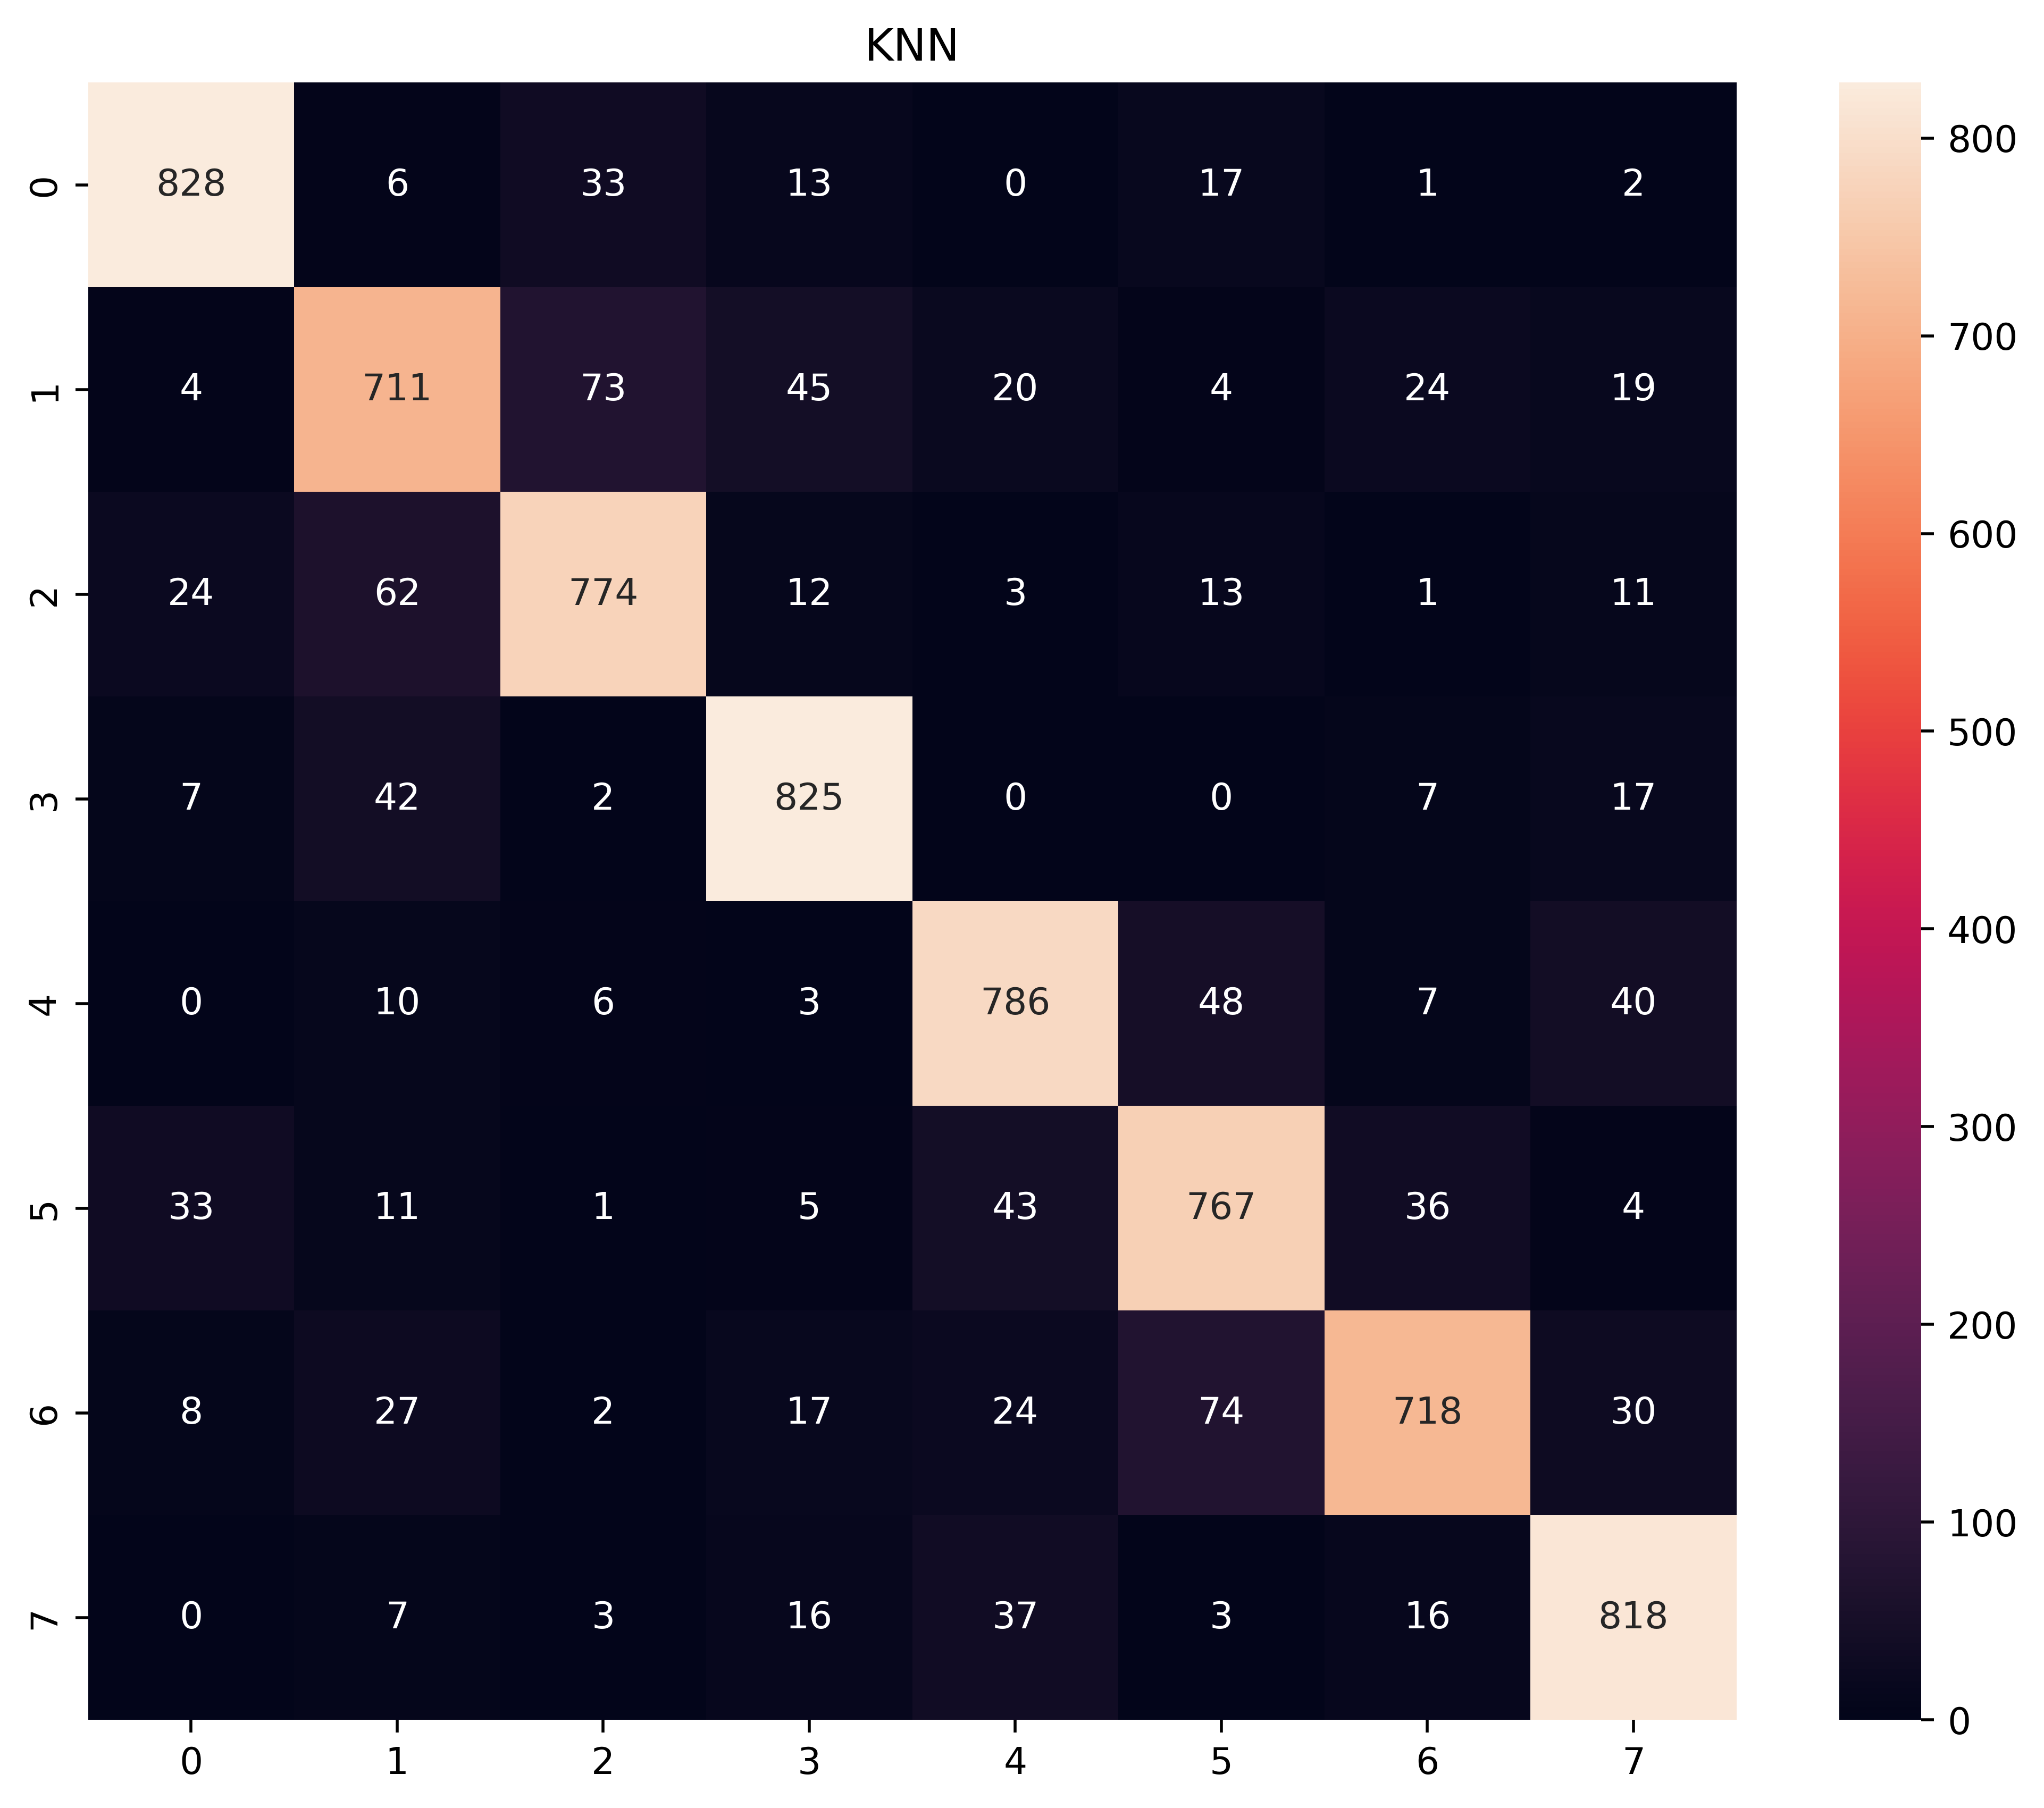

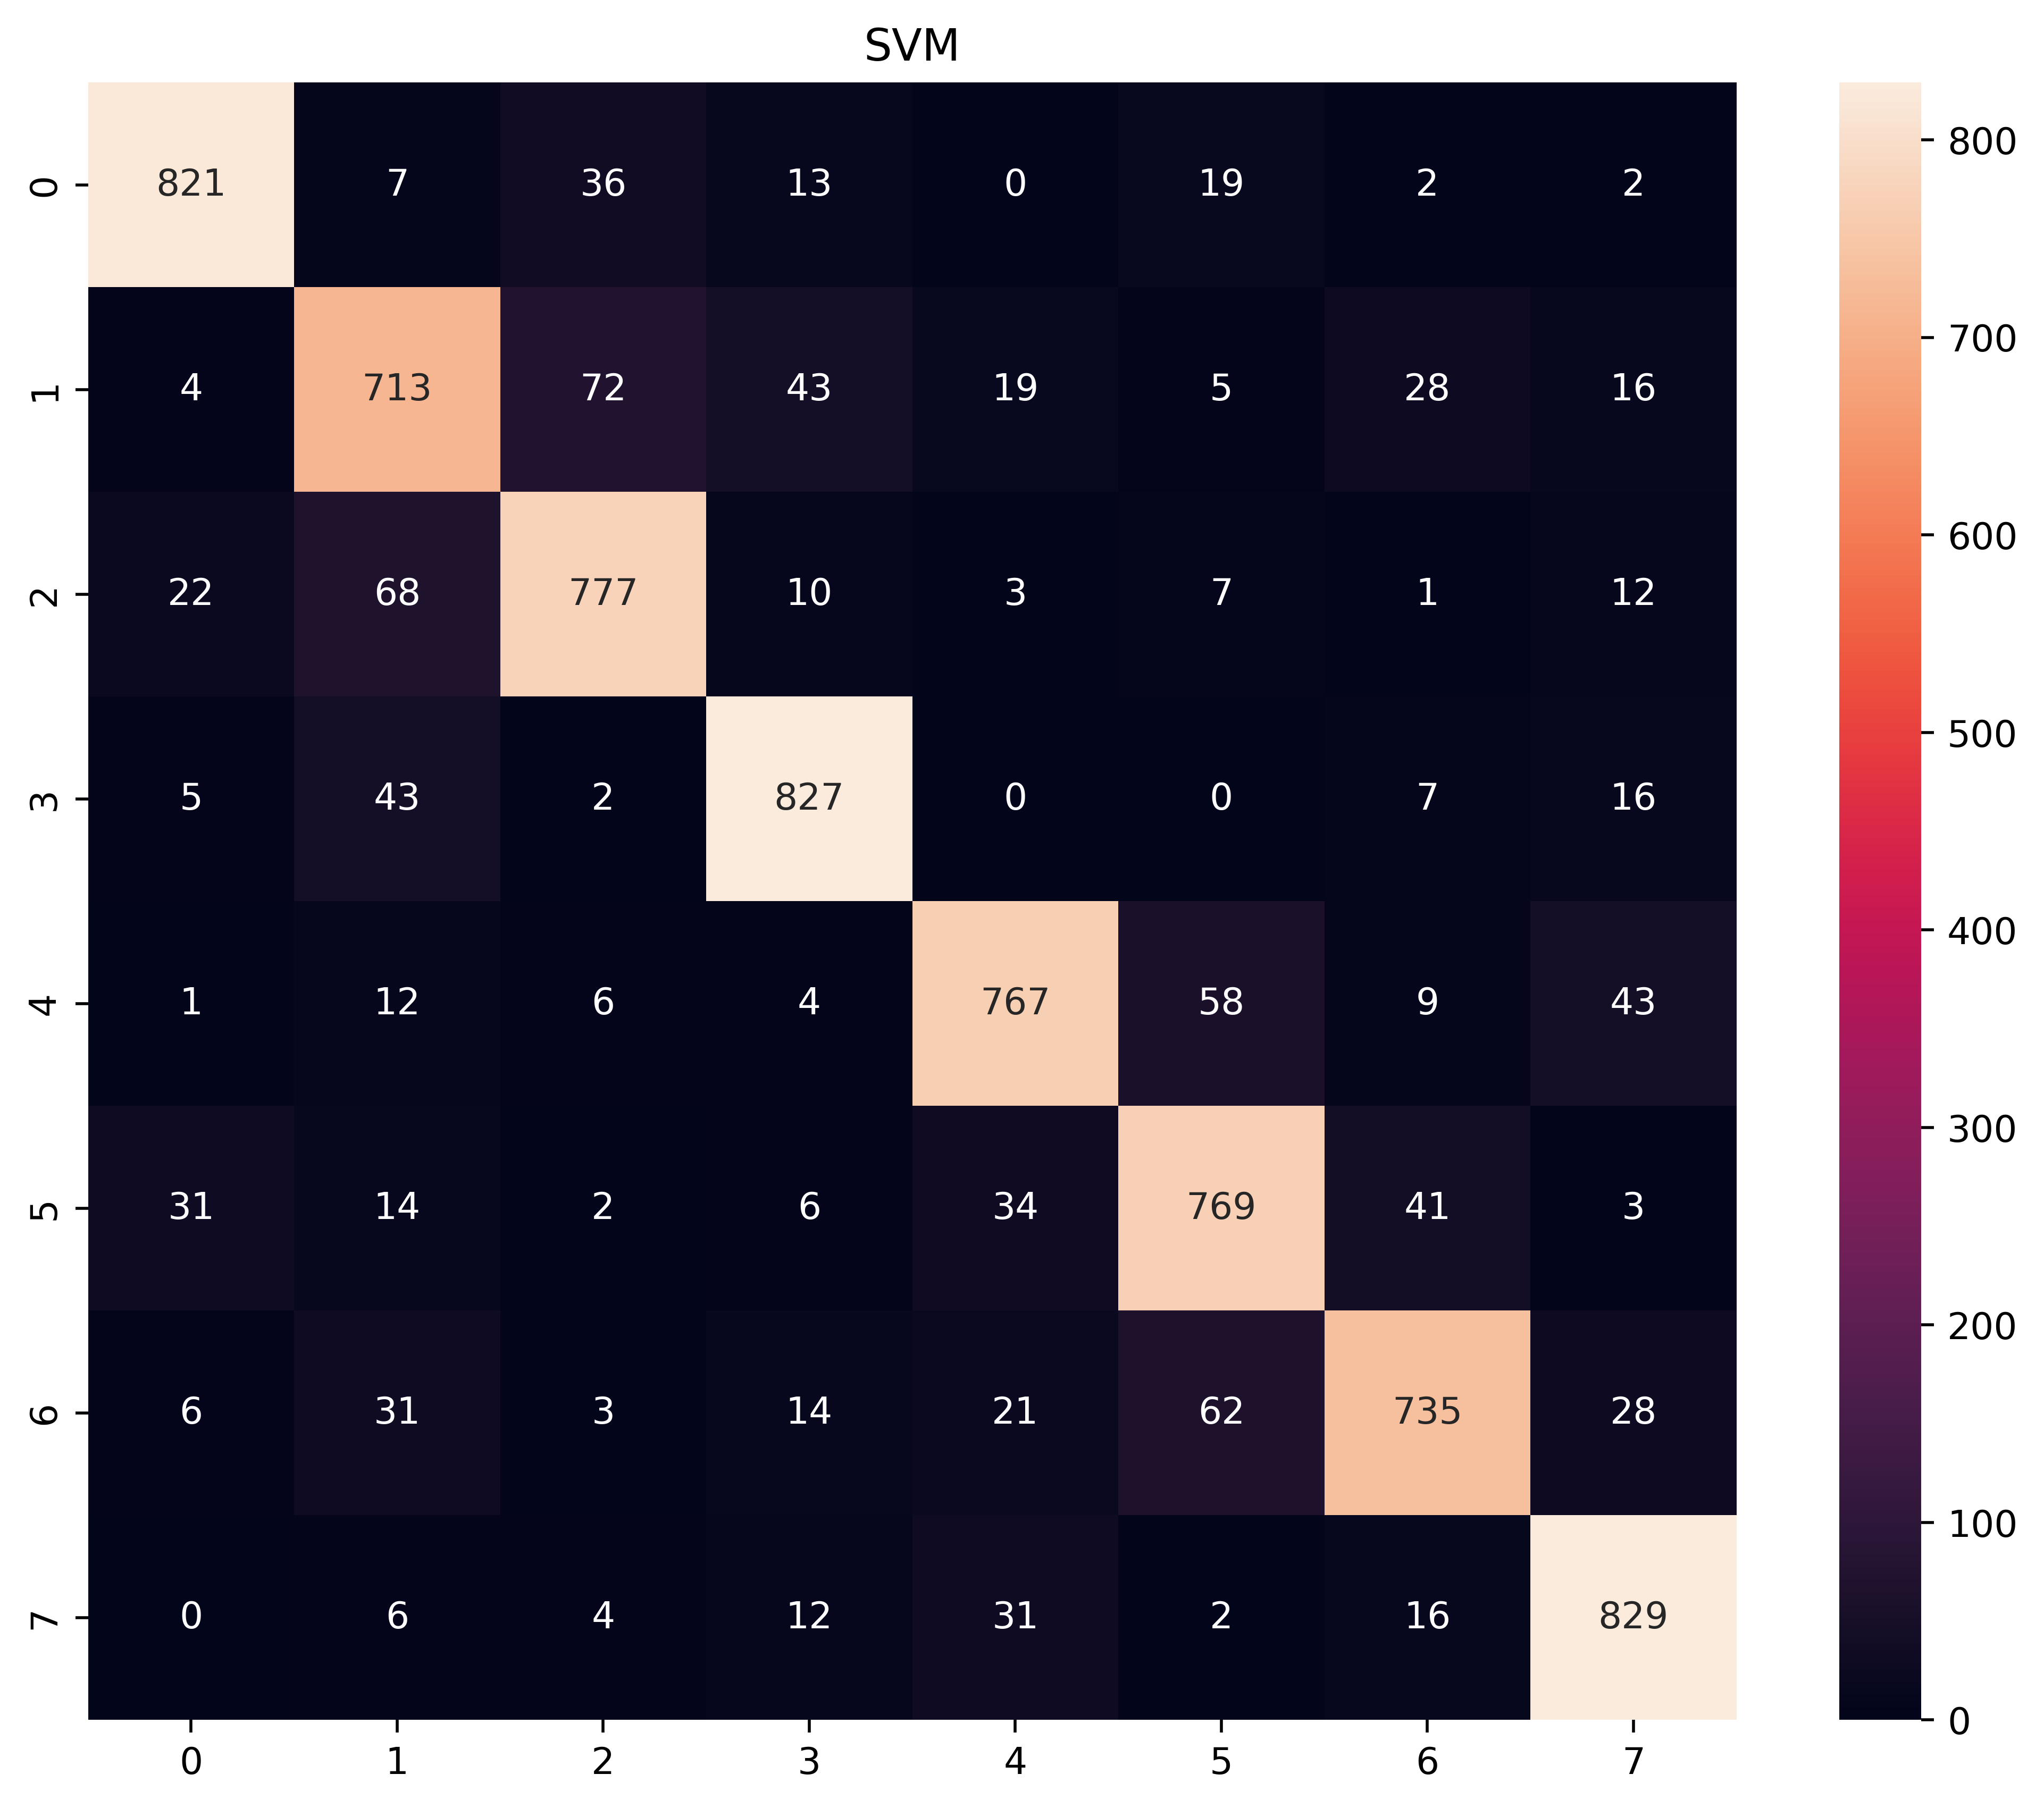

In [46]:
# print(confusion_matrix(Targets1,Modelx1.predict(Features1)))
plt.figure(figsize=(10,8),dpi=500)
plt.title("RandomForest")
sns.heatmap(confusion_matrix(Targets1,Modelx1.predict(Features1)),annot=True,fmt='.20g')
print(classification_report(Targets1,Modelx1.predict(Features1)))
plt.figure(figsize=(10,8),dpi=500)
plt.title("KNN")
sns.heatmap(confusion_matrix(Targets1,Modelx2.predict(Features1)),annot=True,fmt='.20g')
# print(confusion_matrix(Targets1,Modelx2.predict(Features1)))
print(classification_report(Targets1,Modelx2.predict(Features1)))
plt.figure(figsize=(10,8),dpi=500)
plt.title("SVM")
sns.heatmap(confusion_matrix(Targets1,Modelx3.predict(Features1)),annot=True,fmt='.20g')
# print(confusion_matrix(Targets1,Modelx3.predict(Features1)))
print(classification_report(Targets1,Modelx3.predict(Features1)))